In [10]:
import genominterv
import pandas as pd
import numpy as np 
from genominterv import interval_collapse
from genominterv import jaccard
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# loading data
snps_df = pd.read_csv("SNPs.txt", sep='\t')
snps_df.head(10)

,name,chrom,start,region,archaic,Denis
0,ERS699811,1,1562536,EastAsia,human,_SubAfr
1,ERS699811,1,1563789,EastAsia,human,_SubAfr
2,ERS699811,1,1564194,EastAsia,human,_SubAfr
3,ERS699811,1,1601052,EastAsia,human,_SubAfr
4,ERS699811,1,1603103,EastAsia,human,_SubAfr
5,ERS699811,1,2792312,EastAsia,AltaiNea_nofil,_SubAfr
6,ERS699811,1,2792312,EastAsia,Vi33.19_nofil,_SubAfr
7,ERS699811,1,2791891,EastAsia,human,_SubAfr
8,ERS699811,1,2792801,EastAsia,AltaiNea_nofil,_SubAfr
9,ERS699811,1,2792801,EastAsia,Vi33.19_nofil,_SubAfr


In [12]:
#selecting individuals from WE 
WE = [snps_df.loc[(snps_df['name'] == 'S_Turkish-2')],snps_df.loc[(snps_df['name'] == 'S_Bergamo-2')],snps_df.loc[(snps_df['name'] == 'S_Jordanian-3')],snps_df.loc[(snps_df['name'] == 'S_Yemenite_Jew-2')],snps_df.loc[(snps_df['name'] == 'S_French-2')]]
WE = pd.concat(WE)

In [13]:
#selecting individuals from SA 
SA = [snps_df.loc[(snps_df['name'] == 'S_Yadava-2')],snps_df.loc[(snps_df['name'] == 'S_Makrani-1')],snps_df.loc[(snps_df['name'] == 'S_Punjabi-1')],snps_df.loc[(snps_df['name'] == 'S_Punjabi-2')],snps_df.loc[(snps_df['name'] == 'S_Yadava-1')]]
SA = pd.concat(SA)

In [14]:
#selecting individuals from CAS 
CAS = [snps_df.loc[(snps_df['name'] == 'S_Even-1')],snps_df.loc[(snps_df['name'] == 'S_Yakut-1')],snps_df.loc[(snps_df['name'] == 'S_Mongola-2')],snps_df.loc[(snps_df['name'] == 'S_Eskimo_Sireniki-1')],snps_df.loc[(snps_df['name'] == 'S_Tubalar-1')]]
CAS = pd.concat(CAS)

In [15]:
#selecting individuals from EA 
EA = [snps_df.loc[(snps_df['name'] == 'S_Kinh-1')],snps_df.loc[(snps_df['name'] == 'S_Dai-1')],snps_df.loc[(snps_df['name'] == 'ERS724854')],snps_df.loc[(snps_df['name'] == 'S_Japanese-1')],snps_df.loc[(snps_df['name'] == 'ERS724864')]]
EA = pd.concat(EA)

In [16]:
#selecting individuals from 1st cluster 0f 40 ind 
pap1 = [snps_df.loc[(snps_df['name'] == 'TAR01')],snps_df.loc[(snps_df['name'] == 'TAR04')],snps_df.loc[(snps_df['name'] == 'TAR02')],snps_df.loc[(snps_df['name'] == '13784_1')],snps_df.loc[(snps_df['name'] == '13748_6')]]
pap1 = pd.concat(pap1)

In [17]:
#selecting individuals from 2st cluster 0f 35 ind 
pap2 = [snps_df.loc[(snps_df['name'] == 'UV927')],snps_df.loc[(snps_df['name'] == 'UV1230')],snps_df.loc[(snps_df['name'] == 'UV518')],snps_df.loc[(snps_df['name'] == 'UV043')],snps_df.loc[(snps_df['name'] == 'UV956')]]
pap2 = pd.concat(pap2)

In [18]:
#selecting individuals from 3st cluster 0f 14 ind 
pap3 = [snps_df.loc[(snps_df['name'] == 'S_Papuan-7')],snps_df.loc[(snps_df['name'] == 'S_Papuan-10')],snps_df.loc[(snps_df['name'] == 'S_Papuan-2')],snps_df.loc[(snps_df['name'] == 'S_Papuan-4')],snps_df.loc[(snps_df['name'] == 'S_Papuan-5')]]
pap3 = pd.concat(pap3)

In [19]:
frame = [WE, SA, CAS, EA, pap1, pap2, pap3]
df = pd.concat(frame)
df.name.unique()

array(['S_Turkish-2', 'S_Bergamo-2', 'S_Jordanian-3', 'S_Yemenite_Jew-2',
       'S_French-2', 'S_Yadava-2', 'S_Makrani-1', 'S_Punjabi-1',
       'S_Punjabi-2', 'S_Yadava-1', 'S_Even-1', 'S_Yakut-1',
       'S_Mongola-2', 'S_Eskimo_Sireniki-1', 'S_Tubalar-1', 'S_Kinh-1',
       'S_Dai-1', 'ERS724854', 'S_Japanese-1', 'ERS724864', 'TAR01',
       'TAR04', 'TAR02', '13784_1', '13748_6', 'UV927', 'UV1230', 'UV518',
       'UV043', 'UV956', 'S_Papuan-7', 'S_Papuan-10', 'S_Papuan-2',
       'S_Papuan-4', 'S_Papuan-5'], dtype=object)

In [20]:
# Get individual-pop relationships
indv_pop = df[["name", "region"]].drop_duplicates()
indv_pop.head(6)

,name,region
4035937,S_Turkish-2,WestEurasia
2967796,S_Bergamo-2,WestEurasia
3567331,S_Jordanian-3,WestEurasia
4111456,S_Yemenite_Jew-2,WestEurasia
3273796,S_French-2,WestEurasia
6969212,S_Yadava-2,SouthAsia


In [21]:
# Get individuals
individuals = []
for ind in indv_pop['name']:
    individuals.append(ind)

In [22]:
# Generate an end column
df["end"] = df["start"]+1

In [23]:
#get origin
np.unique(df["archaic"])
origin = ['Denisova_nofil', 'AltaiNea_nofil', 'Vi33.19_nofil', 'human']

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


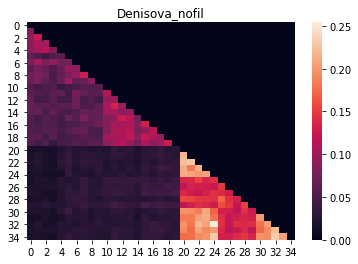

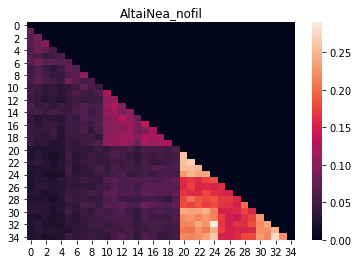

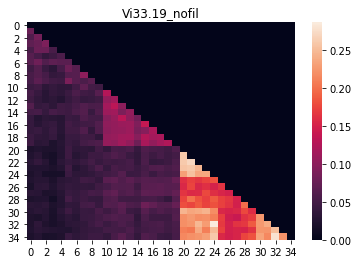

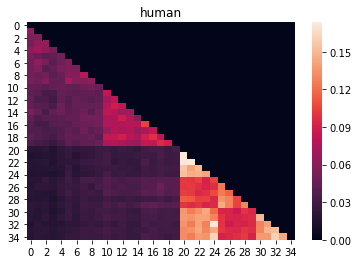

In [24]:

# Iterate over genome_origin (optionally) and pairs of individuals
for genom_origin in origin:
    subset_df = df[snps_df["archaic"]==genom_origin].copy()
    # Create empty matrix
    jacc_matrix = np.zeros((len(individuals),len(individuals)))
    
    
    for i in range(len(individuals)):
        for j in range(i + 1 , len(individuals)):
            # Get the individuals
            indv1 = individuals[i]
            indv2 = individuals[j]
            # Get the dataframes
            subset_df_indv1 = interval_collapse(subset_df[subset_df["name"]==indv1].copy())
            subset_df_indv2 = interval_collapse(subset_df[subset_df["name"]==indv2].copy())
            # Compute Jaccard index
            jacc_matrix[i,j] = jaccard(subset_df_indv1,subset_df_indv2)
            
    
    # Do something with the full matrix -> e.g plot heatmap
    plt.figure() # Create aa new figure
    sns.heatmap(np.transpose(jacc_matrix)).set_title(genom_origin)
    


In [27]:
# Get individual-pop-region relationships, run next cell first
indv_reg = df[["name", "region"]].drop_duplicates()
#ind_pop_reg = pd.concat(indv_reg,pop)
indv_reg['population'] = pop

heat_map_index = []
for i in range(35):
    heat_map_index.append(i)
    
indv_reg['heat_map_index'] = heat_map_index  
indv_reg

,name,region,population,heat_map_index
4035937,S_Turkish-2,WestEurasia,Turkish,0
2967796,S_Bergamo-2,WestEurasia,Bergamo,1
3567331,S_Jordanian-3,WestEurasia,Jordanian,2
4111456,S_Yemenite_Jew-2,WestEurasia,Yemenite_Jew,3
3273796,S_French-2,WestEurasia,French,4
6969212,S_Yadava-2,SouthAsia,Yadava,5
6610627,S_Makrani-1,SouthAsia,Makrani,6
6746255,S_Punjabi-1,SouthAsia,Punjabi,7
6774398,S_Punjabi-2,SouthAsia,Punjabi,8
6943668,S_Yadava-1,SouthAsia,Yadava,9


In [26]:
pop = ['Turkish',
 'Bergamo',
 'Jordanian',
 'Yemenite_Jew',
 'French',
 'Yadava',
 'Makrani',
 'Punjabi',
 'Punjabi',
 'Yadava',
 'Even',
 'Yakut',
 'Mongola',
 'Eskimo_Sireniki',
 'Tubalar',
 'Kinh',
 'Dai',
 'Chepang',
 'Japanese',
 'Limbu',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans',
 'Papuans']